## Our own functions
* Header: def__(args):
* Body: Needs to be indented. It finishes with return__

In [2]:
# Example on thermodynamics
#pV = nRT
#p = n*k_b*T,
#n = rho/mu*m [1/m³]

# Boltzmann constant k_b:
k_b = 1.380649e-23 #m2 kg s-2 K-1 #this is not recommended. It is better to use scipy constants.

# Header
def thermal_pressure(nden, temp):
  # Body
  """
  Function used to compute the thermal pressure of ideal gases
  Inputs: nden (number density: number of particles per unit volume), temp (temperature) #these can be ndarrays (since in python functions
  are vectorized.
  Output: prs (pressure)
  Author: W.E.B.B.
  Date created: 28/04/23
  Date modified: 26/02/2024
  """

  # What you compute
  prs = nden*k_b*temp

  # What you return
  return prs

In [3]:
help(thermal_pressure) #very useful for people trying to understand our code

Help on function thermal_pressure in module __main__:

thermal_pressure(nden, temp)
    Function used to compute the thermal pressure of ideal gases
    Inputs: nden (number density: number of particles per unit volume), temp (temperature) #these can be ndarrays (since in python functions
    are vectorized.
    Output: prs (pressure)
    Author: W.E.B.B.
    Date created: 28/04/23
    Date modified: 26/02/2024



In [14]:
# Call the function
ndens1 = 0.1 #m^{-3}
temp1 = 290 #K

pres1 = thermal_pressure(ndens1, temp1)

print("The pressure in N/m^2 is:", pres1)

The pressure in N/m^2 is: 4.0038821000000004e-22


* Log scale when plotting or taking the log or the data before
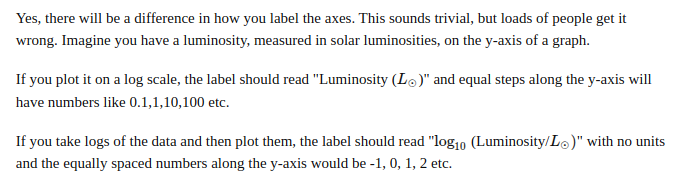

In [1]:
import numpy as np
# Evaluate function using vectors
n_vector = np.arange(-3., 5., 0.1) # in log10 scale, then it goes from 10^-3 to 10⁵ particles
T_vector = np.arange(1., 9., 0.1) # in log10 scale

#When to use log scale or linear scale
#depends on the ratio between the lowest and the max numbers of the data. The dex number
# dex = log10(max/min)
#If dex > 4, the best is to present using a log scale
#If the dex <= 4, then linear scale is fine

# Create a 2D grid
n_2D, T_2D = np.meshgrid(n_vector, T_vector) #create a grid to evaluate the function using arrays, since you can not feed 1D arrays to a 2D function

print(n_vector.shape)
print(T_vector.shape)
print(n_2D, n_2D.shape)
print(T_2D, T_2D.shape)

(80,)
(80,)
[[-3.  -2.9 -2.8 ...  4.7  4.8  4.9]
 [-3.  -2.9 -2.8 ...  4.7  4.8  4.9]
 [-3.  -2.9 -2.8 ...  4.7  4.8  4.9]
 ...
 [-3.  -2.9 -2.8 ...  4.7  4.8  4.9]
 [-3.  -2.9 -2.8 ...  4.7  4.8  4.9]
 [-3.  -2.9 -2.8 ...  4.7  4.8  4.9]] (80, 80)
[[1.  1.  1.  ... 1.  1.  1. ]
 [1.1 1.1 1.1 ... 1.1 1.1 1.1]
 [1.2 1.2 1.2 ... 1.2 1.2 1.2]
 ...
 [8.7 8.7 8.7 ... 8.7 8.7 8.7]
 [8.8 8.8 8.8 ... 8.8 8.8 8.8]
 [8.9 8.9 8.9 ... 8.9 8.9 8.9]] (80, 80)


In [11]:
# Call the function:

pres_2D = thermal_pressure(10**n_2D, 10**T_2D) # make sure the function receives 
#linear quantities (not log-transformed ones) for its computation.

print(pres_2D.shape) #press_2D is a surface

(80, 80)


In [2]:
import matplotlib.pyplot as plt
import scipy.constants as cte

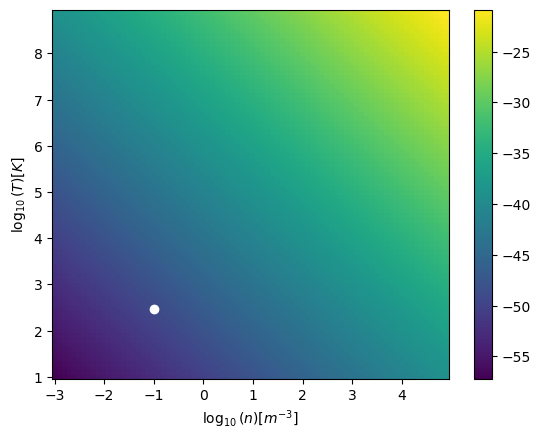

In [17]:
# Ready to plot the solution (2d array)

plt.figure()

# This is to plot a surface
Z = plt.pcolor(n_2D, T_2D, np.log(pres_2D)) #again present data in log scale

plt.plot(np.log10(ndens1), np.log10(temp1), linestyle = " ", marker = "o", color = "white") #to find the first output of the
#function on the surface

# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$\log_{10}(n) [m^{-3}]$")
plt.ylabel(r"$\log_{10}(T) [K]$")

plt.show()

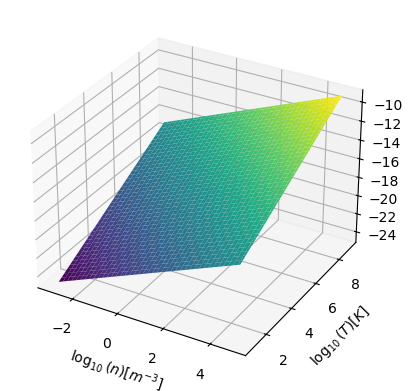

In [18]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(n_2D, T_2D, np.log10(pres_2D), cmap = 'viridis')

ax.set_xlabel(r"$\log_{10}(n) [m^{-3}]$")
ax.set_ylabel(r"$\log_{10}(T) [K]$")

plt.show() #we get a plain surface since the relation between pressure and temperature is linear

## Example on thermodynamics: Multiple returned objects

In [20]:
# Define 1 amu
m = cte.atomic_mass
print(m)

# Define Boltzmann constant
k_b = cte.k
print(k_b)

# Fix mu for ionised gas
mu_i = 0.6

1.66053906892e-27
1.380649e-23


In [21]:
# New function
def thermal_gas(nden, temp):
    # Body
    """
    Function used to compute the thermal pressure of ideal gases
    Inputs: nden (number density), temp (temperature)
    Output: prs (pressure), den (mass density)
    Author: W.E.B.B.
    Date created: 28/04/23
    Date modified: 26/02/2024
    """

    # What you compute
    prs = nden*k_b*temp

    # New: mass density
    den = mu_i*nden*m


    # What you return
    return prs, den

In [22]:
help(thermal_gas)

Help on function thermal_gas in module __main__:

thermal_gas(nden, temp)
    Function used to compute the thermal pressure of ideal gases
    Inputs: nden (number density), temp (temperature)
    Output: prs (pressure), den (mass density)
    Author: W.E.B.B.
    Date created: 28/04/23
    Date modified: 26/02/2024



In [23]:
# Call the new function:

pres_2D, dens_2D = thermal_gas(10**n_2D, 10**T_2D)
print(pres_2D.shape, dens_2D.shape)

(80, 80) (80, 80)


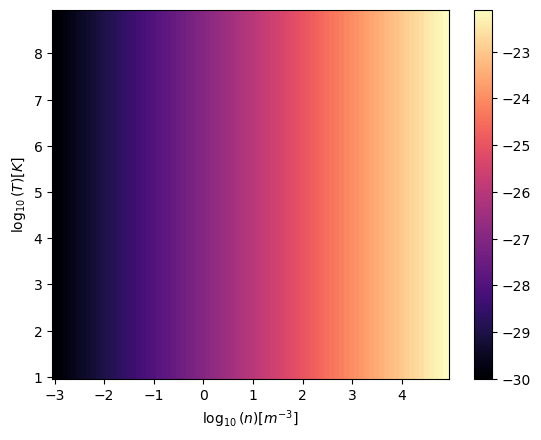

In [24]:
# Ready to plot the density solution (2d array)

plt.figure()

# This is to plot a surface
Z = plt.pcolor(n_2D, T_2D, np.log10(dens_2D), cmap = "magma")

# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$\log_{10}(n) [m^{-3}]$")
plt.ylabel(r"$\log_{10}(T) [K]$")

plt.show()

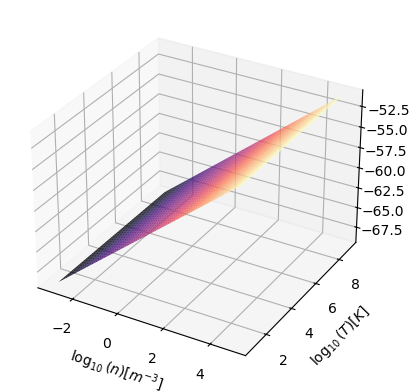

In [27]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(n_2D, T_2D, np.log(dens_2D), cmap = 'magma')

ax.set_xlabel(r"$\log_{10}(n) [m^{-3}]$")
ax.set_ylabel(r"$\log_{10}(T) [K]$")

plt.show()

## Lambda functions

In [30]:
# Instead we can use a lambda function
z_1D = lambda x: x**3
x_1D = np.arange(0.,10.,1.)

print(z_1D(x_1D))
print(type(5.))

[  0.   1.   8.  27.  64. 125. 216. 343. 512. 729.]
<class 'float'>


In [3]:
# Instead we can use a lambda function
import numpy as np
# Create 1D vectors
x = np.arange(-2*np.pi, +2*np.pi, 0.01) #generate the vectors
y = np.arange(-2*np.pi, +2*np.pi, 0.01)

# Create 2D arrays for the grid
x_2D, y_2D = np.meshgrid(x, y) #is a two-dimesional object, with squares since the two vectors are the same size

# Define a surface with a lambda function
z_2D = lambda x, y: np.sin(x) + np.cos(y) #use vectorization to feed vectors into functions which are also vectorized (in python by default)

# Checking stuff
print(z_2D(x_2D, y_2D).shape)

(1257, 1257)


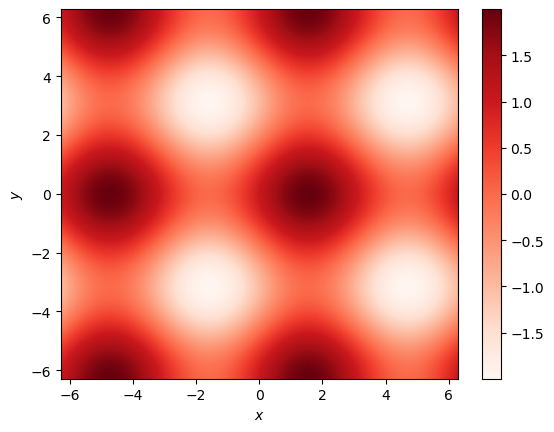

In [39]:
# Ready to plot the density solution (2d array), the projection is sometimes more useful than plotting the surface in 3d

plt.figure()

# This is to plot a surface
Z = plt.pcolor(x_2D, y_2D, z_2D(x_2D, y_2D), cmap = "Reds") #assign color to the countorplots, also can use plt.contour or plt.countorf. 

#DO a grid of this different countor plots.
# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

#Show plot
plt.show()


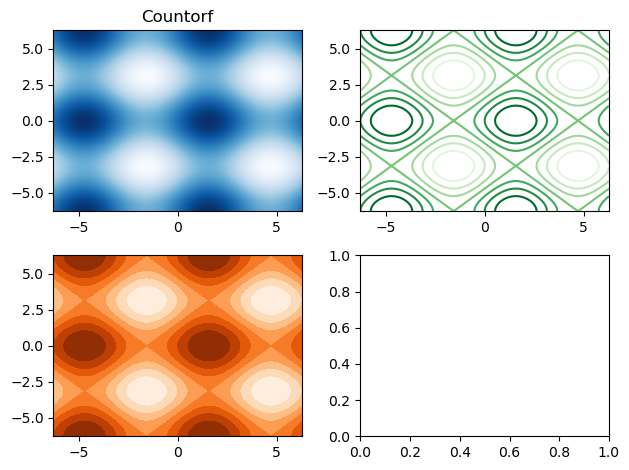

In [5]:
# Method 2: Multi-panel figure using axes objects 

fig, ax = plt.subplots(nrows = 2, ncols = 2) #this is a tuple, the figure object is the panel and ax is a (2,2) array
ax1, ax2, ax3, ax4 = ax.flatten() #.flatten() returns a one-dimensional representation of the original array
#in this case we had a 2D array and we 'flattened' it to a 1D array to access the elements and plot using each one
# ax1 = ax[0,0] (top-left)
# ax2 = ax[0,1] (top-right)
# ax3 = ax[1,0] (bottom-left)
# ax4 = ax[1,1] (bottom-right)

ax1.pcolor(x_2D, y_2D, z_2D(x_2D, y_2D), cmap = "Blues") #assign color to the countorplots, also can use plt.contour or plt.countorf. 
ax1.set_title("Pcolor")
ax2.contour(x_2D, y_2D, z_2D(x_2D, y_2D), cmap = "Greens")
ax1.set_title("Countor")
ax3.contourf(x_2D, y_2D, z_2D(x_2D, y_2D), cmap = "Oranges")
ax1.set_title("Countorf")

plt.tight_layout()
plt.show()
plt.close()


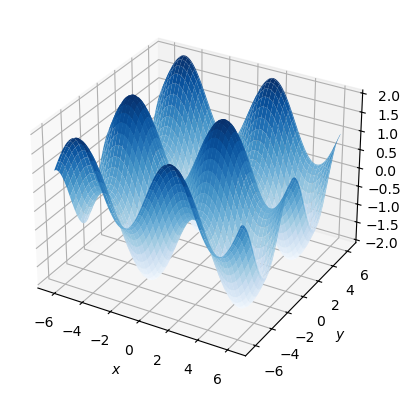

In [4]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_2D, y_2D, z_2D(x_2D, y_2D), cmap = "Blues")

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

plt.show()

## Nested functions

Compute distances between three particles in 3D

In [19]:
# Let's hard code this function

def distance_3d(p1, p2, p3):
    """
    This is to calculate distances between 3 particles in 3D
    Inputs: p1(x1,y1,z1), p2(x2,y2,z2), p3(x3,y3,z3) are 3D coordinates of each particle
    Outputs: d_12, d_13, d_23 are distances between the particles
    """

    d_12 = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)
    d_13 = np.sqrt((p1[0] - p3[0])**2 + (p1[1] - p3[1])**2 + (p1[2] - p3[2])**2)
    d_23 = np.sqrt((p3[0] - p2[0])**2 + (p3[1] - p2[1])**2 + (p3[2] - p2[2])**2)
#this is not efficient for more particles
    return d_12, d_13, d_23

In [6]:
# 2nd method
# Let's use nested functions

# Parent function / Main function
def metric_3d(p1, p2, p3):
    """
    This is to calculate distances between 3 particles in 3D
    Inputs: p1, p2, p3 are 3D coordinates of each particle
    Outputs: d_12, d_13, d_23 are distances between teh particles
    """

    # Nested function / Child function
    def metric(o1, o2):
        """
        This is to compute the distance between two of the particles.
        Inputs: o1 - object1, o2 - object2
        Outputs: distance between objects 1 and 2
        """
        met = np.sqrt((o1[0] - o2[0])**2 + (o1[1] - o2[1])**2 + (o1[2] - o2[2])**2) #the objects are the particles components
        #position, since the metric is always the same

        return met

    d_12 = metric(p1, p2)
    d_13 = metric(p1, p3)
    d_23 = metric(p2, p3)

    return d_12, d_13, d_23

In [8]:
# Unpack outputs
# Define 3D coordinates of th particles

part_1 = (0., 0., 0.)
part_2 = (1., 1., 1.)
part_3 = (3., -3., 3.)

#Unpack outputs
met_12, met_13, met_23 = metric_3d(part_1, part_2, part_3)

print(met_12, met_13, met_23)

1.7320508075688772 5.196152422706632 4.898979485566356


## Recursive functions

In [9]:
# Example

def factorial(n):
  """
  Calculate and return the factorial of n, which is a positive integer
  """

  if n == 1:
    # First case
    f_1 = 1
    return f_1
  else:
    # Other cases, we do a recursive call
    f_2 = n*factorial(n-1)
    return f_2

## Funtions can also be arguments of other functions

In [11]:
# Pass a native python function (abs) to a python object/variable (obj)

obj = abs #assign all properties of the native python function abs to the variable

#Careful with the variable Lambda, is better not use this tag for variables

print(type(obj))
print(obj(-5.))

<class 'builtin_function_or_method'>
5.0


In [24]:
# Another example

print(obj(np.array([-1.,2.,-10.])))

[ 1.  2. 10.]


In [13]:
# Example: not recommeded

obj = max # not recommended since we are redifining the properties of obj, it may get confusing later

print(obj(np.array([-1.,2.,-10.])))

2.0


In [19]:
whos

Variable      Type                          Data/Info
-----------------------------------------------------
T_2D          ndarray                       80x80: 6400 elems, type `float64`, 51200 bytes
T_vector      ndarray                       80: 80 elems, type `float64`, 640 bytes
ax            ndarray                       2x2: 4 elems, type `object`, 32 bytes
ax1           Axes                          Axes(0.0913628,0.549595;0.388276x0.376794)
ax2           Axes                          Axes(0.571002,0.549595;0.388276x0.376794)
ax3           Axes                          Axes(0.0913628,0.0806713;0.388276x0.376794)
ax4           Axes                          Axes(0.571002,0.0806713;0.388276x0.376794)
cte           module                        <module 'scipy.constants'<...>y/constants/__init__.py'>
factorial     function                      <function factorial at 0x787787d31bc0>
fig           Figure                        Figure(640x480)
met_12        float64                       

In [16]:
# Example:

def my_function(f , x):
    """
    This is to evaluate my_function with different trigonometrical 1D functions
    Inputs: f -> a trigonometrical function or any other function
    Outputs: my_function -> y
    """

    y = x**2 + f(x) - 3.

    return y

In [17]:
# Call the function
x_1 = 1.

out_1 =  my_function(np.cos, x_1)

out_2 =  my_function(np.sin, x_1)

print(out_1)

print(out_2)

-1.4596976941318602
-1.1585290151921035


In [18]:
# Now with a lambda function:

out_3 =  my_function(lambda x: x**3, x_1)

print(out_3)

-1.0


## Excercise: The brachistochrone curve

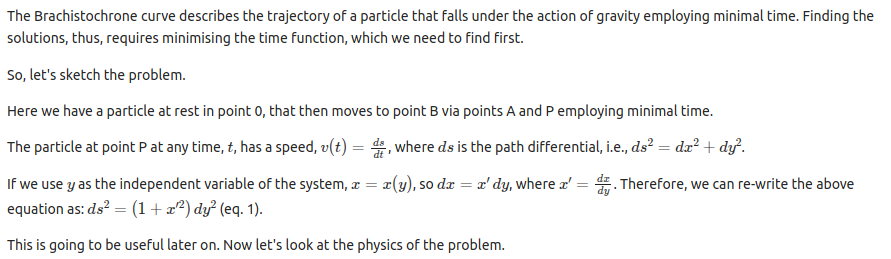

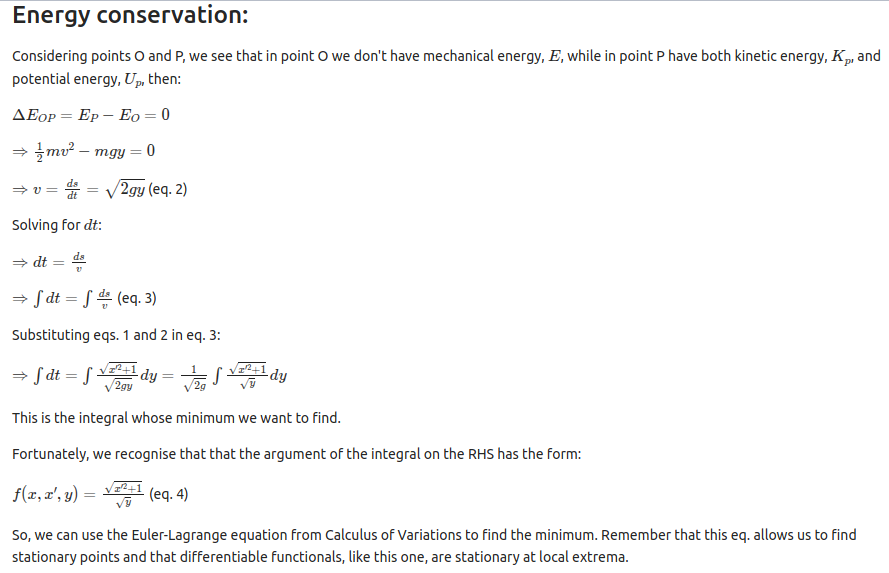

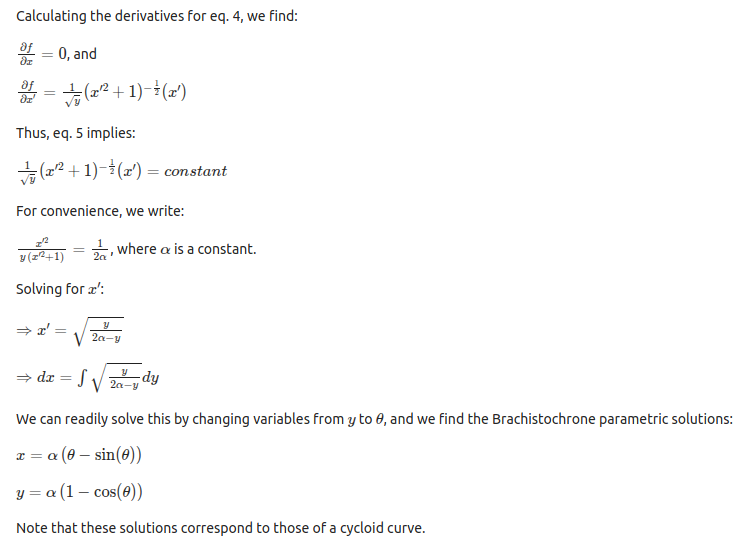

In [20]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Define a function to help us with plotting

def cycloid(alpha):
    """
    Cycloid depends on 2 parameters: alpha, and theta
    Alpha will be an argument of the function
    """

    # Indentation
    # For parametric eqs, it is recommended to add lists
    x = []
    y = []

    # And now we are going to append values by looping over theta
    for theta in np.linspace(0, 10*np.pi, 200):

        x.append(alpha*(theta - np.sin(theta)))
        y.append(alpha*(1. - np.cos(theta)))

    # Cnvert objects returned by the function to ndarrays
    x = np.array(x)
    y = np.array(y)

    return x, y

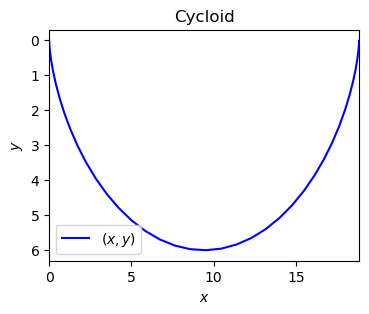

In [27]:
# Plotting
# Define our alpha value
alpha_test = 3.

# Call the function
x_test, y_test = cycloid(alpha_test)

# Let's proceed with plotting
# Open env.
plt.figure(figsize=(4,3))

# Plot
plt.plot(x_test, y_test, color = "blue", linestyle = "-", label = r"$(x,y)$")

# Title with latex syntax
plt.title("Cycloid")

# Axes titles
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

# Legend is added with loc for location
plt.legend(loc=3)

# Invert y axis
plt.gca().invert_yaxis()

# Axes limits
plt.xlim(0,6*np.pi)

# Show/Save
plt.show()